In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
import netCDF4 
ncf = netCDF4.Dataset(r'C:\Users\dhanu\Desktop\New Folder\sgprainwbC1.b1.20100922.000500..20101231.000000.custom.cdf', format = 'NETCDF3_CLASSIC') 

In [3]:
print(ncf)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    command_line: rainwb_ingest -s sgp -f C1 -R -F
    Conventions: ARM-1.1
    process_version: ingest-rainwb-1.1-0.el6
    dod_version: rainwb-b1-1.0
    input_source: /data/home/dyapa/prod/jobs/1413/collection/sgp/sgprainwbC1.00/sgprainC1.00.20121231.235900.raw.wrg-20130101000000.dat
    site_id: sgp
    platform_id: rainwb
    facility_id: C1
    data_level: b1
    location_description: Southern Great Plains (SGP), Lamont, Oklahoma
    datastream: sgprainwbC1.b1
    serial_number: 15493
    sampling_interval: 1 minute
    averaging_interval: 5 minutes
    doi: 10.5439/1224830
    history: created by user dyapa on machine amber at 2016-06-17 18:17:39, using ingest-rainwb-1.1-0.el6
    ANDERS_input_file: /var/ftp/user_order/pantd1/207722/sgprainwbC1.b1.20130101.000000.cdf
    ANDERS_processing_timestamp: Sat Nov 10 18:12:45 2018 UTC
    ANDERS_armtime_timestamp: 1541873565
    ANDERS_vers

In [4]:
print(ncf.variables.keys())

odict_keys(['alt', 'base_time', 'lat', 'lon', 'precip_rate', 'qc_frequency1', 'qc_frequency2', 'qc_frequency3', 'qc_maintenance_cnt', 'qc_precip', 'qc_precip_rate', 'qc_ptemp', 'qc_temp1', 'qc_temp2', 'qc_temp3', 'qc_total_mm', 'qc_total_weight', 'qc_volt_min', 'qc_weight1', 'qc_weight2', 'qc_weight3', 'time', 'time_offset'])


In [5]:
for i in ncf.variables:
    print(i,ncf.variables[i].shape)

alt ()
base_time ()
lat ()
lon ()
precip_rate (104965,)
qc_frequency1 (104965,)
qc_frequency2 (104965,)
qc_frequency3 (104965,)
qc_maintenance_cnt (104965,)
qc_precip (104965,)
qc_precip_rate (104965,)
qc_ptemp (104965,)
qc_temp1 (104965,)
qc_temp2 (104965,)
qc_temp3 (104965,)
qc_total_mm (104965,)
qc_total_weight (104965,)
qc_volt_min (104965,)
qc_weight1 (104965,)
qc_weight2 (104965,)
qc_weight3 (104965,)
time (104965,)
time_offset (104965,)


In [6]:
ncf.variables['qc_precip_rate'].units


'unitless'

In [7]:
ncf.variables['time'].units

'seconds since 2013-01-01 00:00:00 0:00'

In [8]:
ncf.variables['precip_rate'].units

'mm/hr'

In [9]:
at =ncf.variables['alt'][:]
latt =ncf.variables['lat'][:]
long =ncf.variables['lon'][:]
print(at, long, latt)

318.0 -97.485 36.605


In [10]:
prec =ncf.variables['precip_rate'][:]
prec[:20]

masked_array(data=[0.08399999886751175, 0.059999994933605194,
                   0.011999997310340405, 0.023600002750754356,
                   0.011999998241662979, 0.08380000293254852,
                   0.06000000238418579, 0.03599999472498894,
                   0.024000000208616257, 0.0001999974192585796,
                   0.10799999535083771, --, 0.036399997770786285, --, --,
                   0.012199997901916504, --, 0.03580000251531601,
                   0.048399996012449265, --],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False,  True, False,  True,  True, False,
                    True, False, False,  True],
       fill_value=-9999.0,
            dtype=float32)

In [11]:
ncf.variables['time'][:10]

masked_array(data=[   0.,  300.,  600.,  900., 1200., 1500., 1800., 2100.,
                   2400., 2700.],
             mask=False,
       fill_value=1e+20)

In [12]:
time_s =ncf.variables['time']
time_s

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time offset from midnight
    units: seconds since 2013-01-01 00:00:00 0:00
    bounds: time_bounds
    standard_name: time
unlimited dimensions: time
current shape = (104965,)
filling off

In [13]:
dtime = netCDF4.num2date(time_s[:],time_s.units)

In [14]:
dtime[10:]

array([datetime.datetime(2013, 1, 1, 0, 50),
       datetime.datetime(2013, 1, 1, 0, 55),
       datetime.datetime(2013, 1, 1, 1, 0), ...,
       datetime.datetime(2013, 12, 31, 23, 45, 0, 6),
       datetime.datetime(2013, 12, 31, 23, 50),
       datetime.datetime(2013, 12, 31, 23, 55, 0, 10)], dtype=object)

In [15]:
prec_ts = pd.Series(prec, index=dtime) 
prec_ts.to_csv('precip.csv',index=True, header=True)

In [16]:
df= pd.read_csv('precip.csv')
df.head(10)

,Unnamed: 0,0
0,2013-01-01 00:00:00.000000,0.0840
1,2013-01-01 00:05:00.000000,0.0600
2,2013-01-01 00:10:00.000000,0.0120
3,2013-01-01 00:15:00.000000,0.0236
4,2013-01-01 00:20:00.000002,0.0120
5,2013-01-01 00:25:00.000000,0.0838
6,2013-01-01 00:30:00.000006,0.0600
7,2013-01-01 00:35:00.000000,0.0360
8,2013-01-01 00:40:00.000010,0.0240
9,2013-01-01 00:45:00.000000,0.0002


In [17]:
df= df.rename(columns={'Unnamed: 0': 'Time', '0': 'Precipitation'})
df.head(5)

,Time,Precipitation
0,2013-01-01 00:00:00.000000,0.0840
1,2013-01-01 00:05:00.000000,0.0600
2,2013-01-01 00:10:00.000000,0.0120
3,2013-01-01 00:15:00.000000,0.0236
4,2013-01-01 00:20:00.000002,0.0120


In [18]:
df['Time'] = pd.to_datetime(df['Time'])
df['Year'] = df['Time'].apply(lambda Time: Time.year)
df['Month'] = df['Time'].apply(lambda Time: Time.month)
df['Day of Week'] = df['Time'].apply(lambda Time: Time.dayofweek)
df.head(5)

,Time,Precipitation,Year,Month,Day of Week
0,2013-01-01 00:00:00.000000,0.0840,2013,1,1
1,2013-01-01 00:05:00.000000,0.0600,2013,1,1
2,2013-01-01 00:10:00.000000,0.0120,2013,1,1
3,2013-01-01 00:15:00.000000,0.0236,2013,1,1
4,2013-01-01 00:20:00.000002,0.0120,2013,1,1


In [19]:
df.isnull().any()

Time             False
Precipitation     True
Year             False
Month            False
Day of Week      False
dtype: bool

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104965 entries, 0 to 104964
Data columns (total 5 columns):
Time             104965 non-null datetime64[ns]
Precipitation    54367 non-null float64
Year             104965 non-null int64
Month            104965 non-null int64
Day of Week      104965 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.0 MB


In [21]:
df.describe().unstack()

Precipitation  count     54367.000000
               mean          2.288592
               std           6.944356
               min           0.000000
               25%           0.072000
               50%           0.287600
               75%           1.200000
               max          99.659996
Year           count    104965.000000
               mean       2013.000000
               std           0.000000
               min        2013.000000
               25%        2013.000000
               50%        2013.000000
               75%        2013.000000
               max        2013.000000
Month          count    104965.000000
               mean          6.531873
               std           3.446149
               min           1.000000
               25%           4.000000
               50%           7.000000
               75%          10.000000
               max          12.000000
Day of Week    count    104965.000000
               mean          2.997151
            

In [22]:
df[df['Precipitation']>99]

,Time,Precipitation,Year,Month,Day of Week
45459,2013-06-08 08:15:00,99.039990,2013,6,5
45659,2013-06-09 00:55:00,99.659996,2013,6,6
46280,2013-06-11 04:40:00,99.619990,2013,6,1
46935,2013-06-13 11:15:00,99.567990,2013,6,3


D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


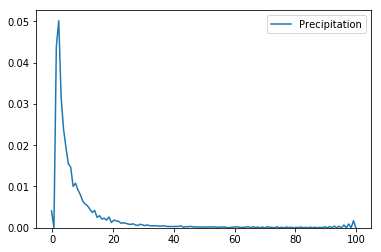

In [23]:
sns.kdeplot(df['Precipitation'])

Text(0.5,1,'Weighing Bucket Rain Guage')

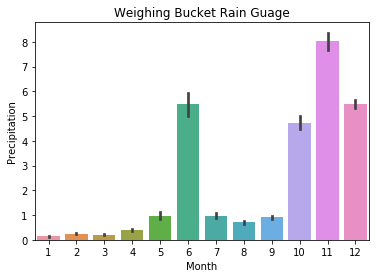

In [24]:
sns.barplot(x='Month',y='Precipitation',data=df)
plt.title('Weighing Bucket Rain Guage')

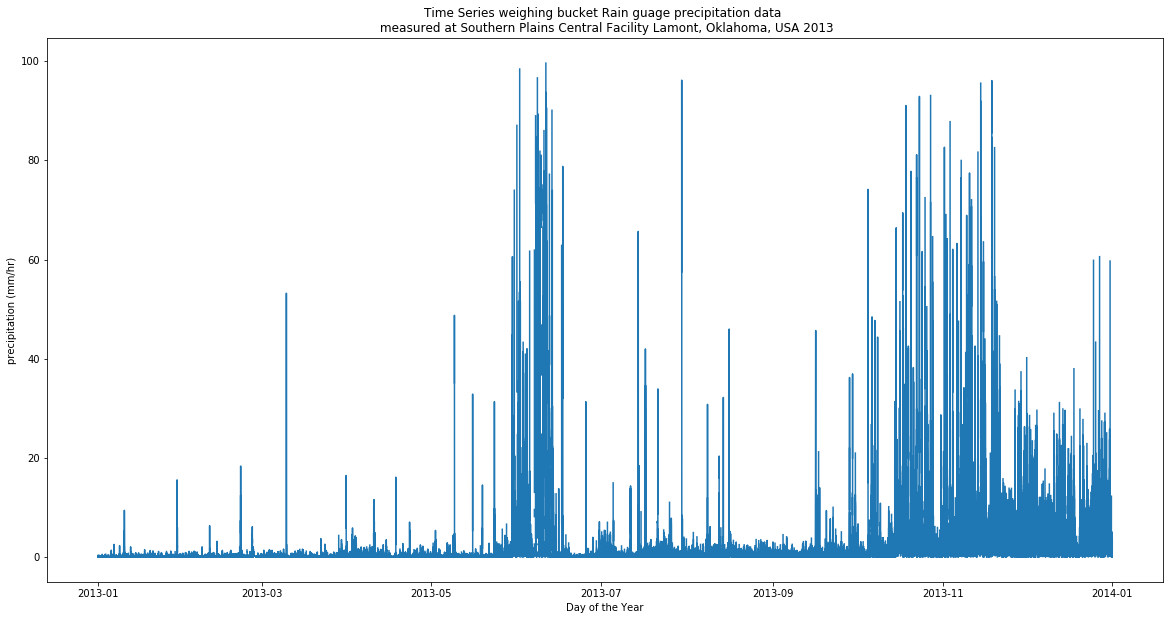

In [112]:
plt.figure(figsize=(20,10))
plt.plot(df['Time'],df['Precipitation'])
plt.xlabel('Day of the Year')
plt.ylabel('precipitation (mm/hr)')
plt.title('Time Series weighing bucket Rain guage precipitation data \n measured at Southern Plains Central Facility Lamont, Oklahoma, USA 2013')
#plt.savefig(r'\Users\dhanu\Desktop\Research Results\TimeseriesWBRGnPDF.png',dpi=300)
#C:\Users\dhanu\Desktop\Research Results

In [27]:
df['Precipitation'].count()

54367

In [28]:
sum(df['Precipitation'].isnull())

50598

In [29]:
df[df['Precipitation'].isnull()].count()

Time             50598
Precipitation        0
Year             50598
Month            50598
Day of Week      50598
dtype: int64

In [30]:
df.head(29)

,Time,Precipitation,Year,Month,Day of Week
0,2013-01-01 00:00:00.000000,0.0840,2013,1,1
1,2013-01-01 00:05:00.000000,0.0600,2013,1,1
2,2013-01-01 00:10:00.000000,0.0120,2013,1,1
3,2013-01-01 00:15:00.000000,0.0236,2013,1,1
4,2013-01-01 00:20:00.000002,0.0120,2013,1,1
5,2013-01-01 00:25:00.000000,0.0838,2013,1,1
6,2013-01-01 00:30:00.000006,0.0600,2013,1,1
7,2013-01-01 00:35:00.000000,0.0360,2013,1,1
8,2013-01-01 00:40:00.000010,0.0240,2013,1,1
9,2013-01-01 00:45:00.000000,0.0002,2013,1,1


In [31]:
dp= df.drop('Day of Week', axis=1)

In [32]:
dp.head(10)

,Time,Precipitation,Year,Month
0,2013-01-01 00:00:00.000000,0.0840,2013,1
1,2013-01-01 00:05:00.000000,0.0600,2013,1
2,2013-01-01 00:10:00.000000,0.0120,2013,1
3,2013-01-01 00:15:00.000000,0.0236,2013,1
4,2013-01-01 00:20:00.000002,0.0120,2013,1
5,2013-01-01 00:25:00.000000,0.0838,2013,1
6,2013-01-01 00:30:00.000006,0.0600,2013,1
7,2013-01-01 00:35:00.000000,0.0360,2013,1
8,2013-01-01 00:40:00.000010,0.0240,2013,1
9,2013-01-01 00:45:00.000000,0.0002,2013,1


In [33]:
dp.fillna(0, inplace=True)
dp.head(10)

,Time,Precipitation,Year,Month
0,2013-01-01 00:00:00.000000,0.0840,2013,1
1,2013-01-01 00:05:00.000000,0.0600,2013,1
2,2013-01-01 00:10:00.000000,0.0120,2013,1
3,2013-01-01 00:15:00.000000,0.0236,2013,1
4,2013-01-01 00:20:00.000002,0.0120,2013,1
5,2013-01-01 00:25:00.000000,0.0838,2013,1
6,2013-01-01 00:30:00.000006,0.0600,2013,1
7,2013-01-01 00:35:00.000000,0.0360,2013,1
8,2013-01-01 00:40:00.000010,0.0240,2013,1
9,2013-01-01 00:45:00.000000,0.0002,2013,1


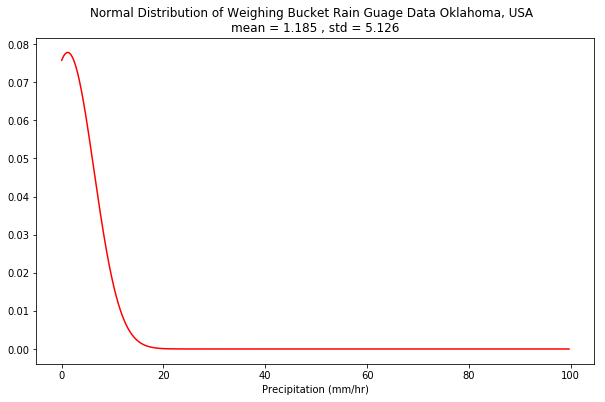

In [114]:
plt.figure(figsize=(10,6))
sdp= sorted(dp['Precipitation'])   
pdf =stats.norm.pdf(sdp,np.mean(sdp),np.std(sdp))
plt.plot(sdp,pdf,'r')
plt.xlabel('Precipitation (mm/hr)')
plt.title('Normal Distribution of Weighing Bucket Rain Guage Data Oklahoma, USA  \nmean = 1.185 , std = 5.126')
#plt.text(.5,.5,'mean = 1.185 , std = 5.126')
plt.plot()
#plt.savefig(r'\Users\dhanu\Desktop\Research Results\WBRGnPDF.png',dpi=300)

In [35]:
sdp.count(0)

51878

In [36]:
sdp[51877:].count(0)

1

In [37]:
pl = sorted(x for x in sdp[51877:]if x >= 0.8)


In [38]:
#plt.figure(figsize=(10,8))
import powerlaw
fit= powerlaw.Fit(pl)
fit.power_law.alpha
fit.power_law.sigma
print(fit.power_law.alpha, fit.power_law.sigma)
fit.distribution_compare('power_law', 'lognormal')
#powerlaw.plot_pdf(sdp, color ='b')

#powerlaw.plot_pdf(sdp[51878:], color ='r',linear_bins= True)
# plt.xlabel('Precipitation rate')


Calculating best minimal value for power law fit
D:\Anaconda\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


2.414922947535805 0.02390973260791302


(-80.61493875518715, 2.15810210250615e-17)

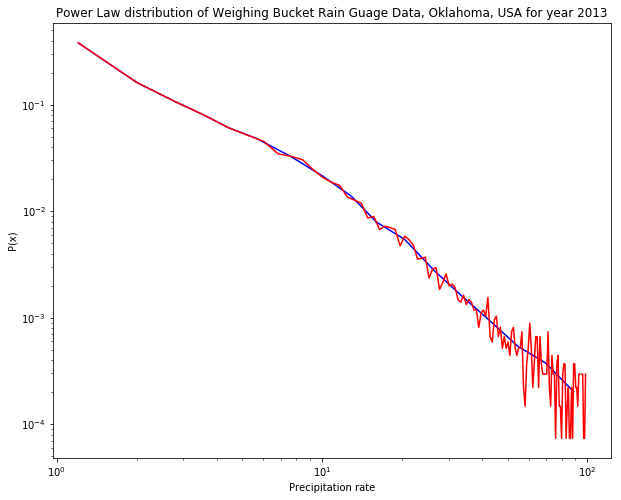

In [39]:
plt.figure(figsize=(10,8))
powerlaw.plot_pdf(pl, color ='b')
powerlaw.plot_pdf(pl, color ='r',linear_bins= True)
plt.xlabel('Precipitation rate')
plt.ylabel('P(x)')

plt.title('Power Law distribution of Weighing Bucket Rain Guage Data, Oklahoma, USA for year 2013' )
#plt.savefig(r'\Users\dhanu\Desktop\Research Results\OKTRG.png',dpi=300)

In [40]:
tm= pd.read_csv(r"C:\Users\dhanu\Desktop\newdata\g4OKLAHAMA.areaAvgTimeSeries.TRMM_3B42RT_7_precipitation.20130101-20131231.97W_36N_97W_36N.csv",skiprows=8)
tm.head()

,time,mean_TRMM_3B42RT_7_precipitation
0,2012-12-31 22:30:00,0.0
1,2013-01-01 01:30:00,0.0
2,2013-01-01 04:30:00,0.0
3,2013-01-01 07:30:00,0.0
4,2013-01-01 10:30:00,0.0


In [41]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 2 columns):
time                                 2921 non-null object
 mean_TRMM_3B42RT_7_precipitation    2921 non-null float64
dtypes: float64(1), object(1)
memory usage: 45.7+ KB


In [42]:
tm.describe()

,mean_TRMM_3B42RT_7_precipitation
count,2921.000000
mean,0.132134
std,0.852368
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,19.280001


In [43]:
tm.isnull().any()

time                                 False
 mean_TRMM_3B42RT_7_precipitation    False
dtype: bool

In [44]:
tm['time'] = pd.to_datetime(tm['time'])

In [45]:
tm.rename(columns={' mean_TRMM_3B42RT_7_precipitation':'precipitation'}, inplace=True)

In [46]:
tm.head()

,time,precipitation
0,2012-12-31 22:30:00,0.0
1,2013-01-01 01:30:00,0.0
2,2013-01-01 04:30:00,0.0
3,2013-01-01 07:30:00,0.0
4,2013-01-01 10:30:00,0.0


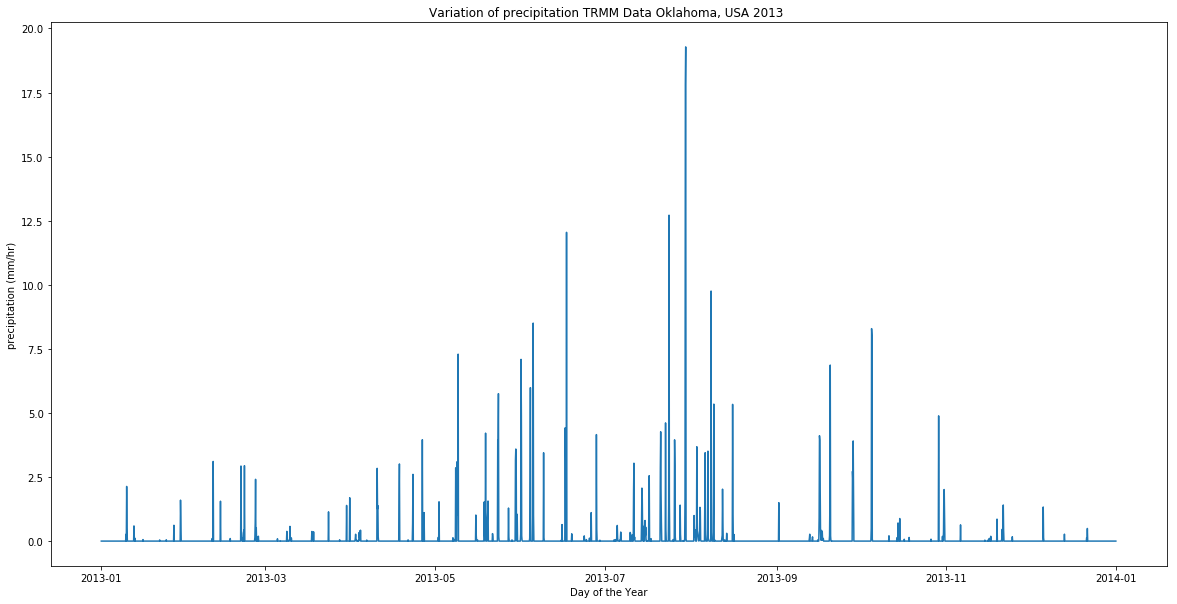

In [115]:
plt.figure(figsize=(20,10))
plt.plot(tm['time'],tm['precipitation'])
plt.xlabel('Day of the Year')
plt.ylabel('precipitation (mm/hr)')
plt.title('Variation of precipitation TRMM Data Oklahoma, USA 2013 ')
plt.savefig(r'\Users\dhanu\Desktop\Research Results\TimeseriesTRMM.png',dpi=300)

0.1321338847324649 0.8522225078204371


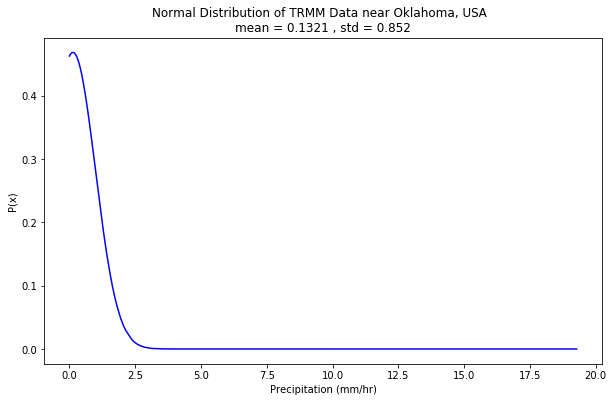

In [116]:
 plt.figure(figsize=(10,6))
# sdp= sorted(dp['Precipitation'])   
# pdf =stats.norm.pdf(sdp,np.mean(sdp),np.std(sdp))
# plt.plot(sdp,pdf,'r')

stm= sorted(tm['precipitation'])   
spdf =stats.norm.pdf(stm,np.mean(stm),np.std(stm))
plt.plot(stm,spdf,'b')

plt.xlabel('Precipitation (mm/hr)')
plt.ylabel('P(x)')
plt.title('Normal Distribution of TRMM Data near Oklahoma, USA  \nmean = 0.1321 , std = 0.852')
#plt.text(.5,.5,'mean = 1.185 , std = 5.126')
plt.plot()
print(np.mean(stm),np.std(stm))
plt.savefig(r'\Users\dhanu\Desktop\Research Results\TRMMnPDF.png',dpi=300)

In [49]:
print(np.mean(stm),np.std(stm))

0.1321338847324649 0.8522225078204371


In [50]:
ttm = sorted(x for x in stm if x >= 0.8)
# data are selected greater than 0.8 to fit inside the power law tails. As it starts at 10^0 =1. But it is not necessary

In [51]:
fit= powerlaw.Fit(ttm)
fit.power_law.alpha
fit.power_law.sigma
print(fit.power_law.alpha, fit.power_law.sigma)
fit.distribution_compare('power_law', 'lognormal')

2.9517120829594283 0.2846864663872151


Calculating best minimal value for power law fit
D:\Anaconda\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(-0.08678436795259226, 0.7660031502930619)

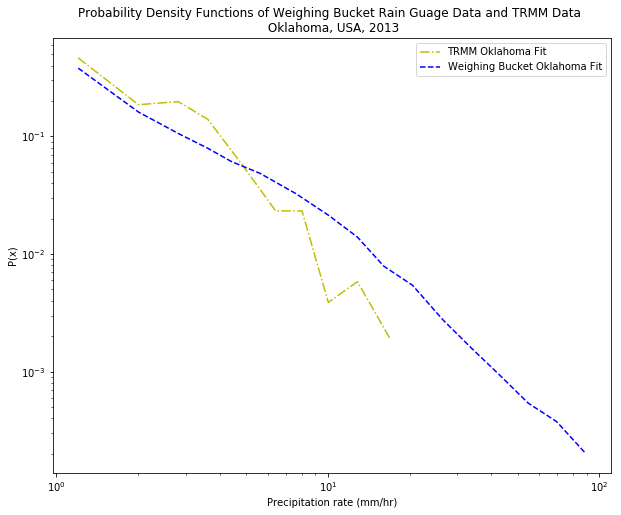

In [117]:
plt.figure(figsize=(10,8))
powerlaw.plot_pdf(ttm, color ='y', label= 'TRMM Oklahoma Fit',linestyle ='-.')
#powerlaw.plot_pdf(ttm, color ='g',linear_bins= True, label= 'TRMM Oklahoma')

#plt.title('Power Law distribution of Weighing Bucket Rain Guage Data, Oklahama, USA for year 2013' )

powerlaw.plot_pdf(pl, color ='b', linestyle ='--',label ='Weighing Bucket Oklahoma Fit')
#powerlaw.plot_pdf(pl, color ='r',linear_bins= True, label= 'Weighing Bucket Data\n Enperical')
plt.legend()
plt.xlabel('Precipitation rate (mm/hr)')
plt.ylabel('P(x)')
plt.title('Probability Density Functions of Weighing Bucket Rain Guage Data and TRMM Data \n Oklahoma, USA, 2013' )
plt.savefig(r'\Users\dhanu\Desktop\Research Results\powerPDF.png',dpi=300)


In [53]:
da= pd.read_csv(r"C:\Users\dhanu\Desktop\newdata\australia\g4.areaAvgTimeSeries.TRMM_3B42RT_7_precipitation.20130101-20131231.131E_13S_132E_12S.csv",skiprows=8)

In [54]:
da.head(5)

,time,TRMM_3B42RT_7_precipitation,Unnamed: 2
0,12/31/2012 22:30,0.0,NaN
1,1/1/2013 1:30,0.0,NaN
2,1/1/2013 4:30,0.0,NaN
3,1/1/2013 7:30,0.0,NaN
4,1/1/2013 10:30,0.0,NaN


In [55]:
da.drop('Unnamed: 2', axis=1, inplace=True)

In [56]:
da.head()

,time,TRMM_3B42RT_7_precipitation
0,12/31/2012 22:30,0.0
1,1/1/2013 1:30,0.0
2,1/1/2013 4:30,0.0
3,1/1/2013 7:30,0.0
4,1/1/2013 10:30,0.0


In [57]:
da.isnull().any()

time                            False
 TRMM_3B42RT_7_precipitation    False
dtype: bool

In [58]:
da['time'] = pd.to_datetime(da['time'])

In [59]:
da.rename(columns={' TRMM_3B42RT_7_precipitation':'precipitation'}, inplace=True)

In [60]:
da.head()

,time,precipitation
0,2012-12-31 22:30:00,0.0
1,2013-01-01 01:30:00,0.0
2,2013-01-01 04:30:00,0.0
3,2013-01-01 07:30:00,0.0
4,2013-01-01 10:30:00,0.0


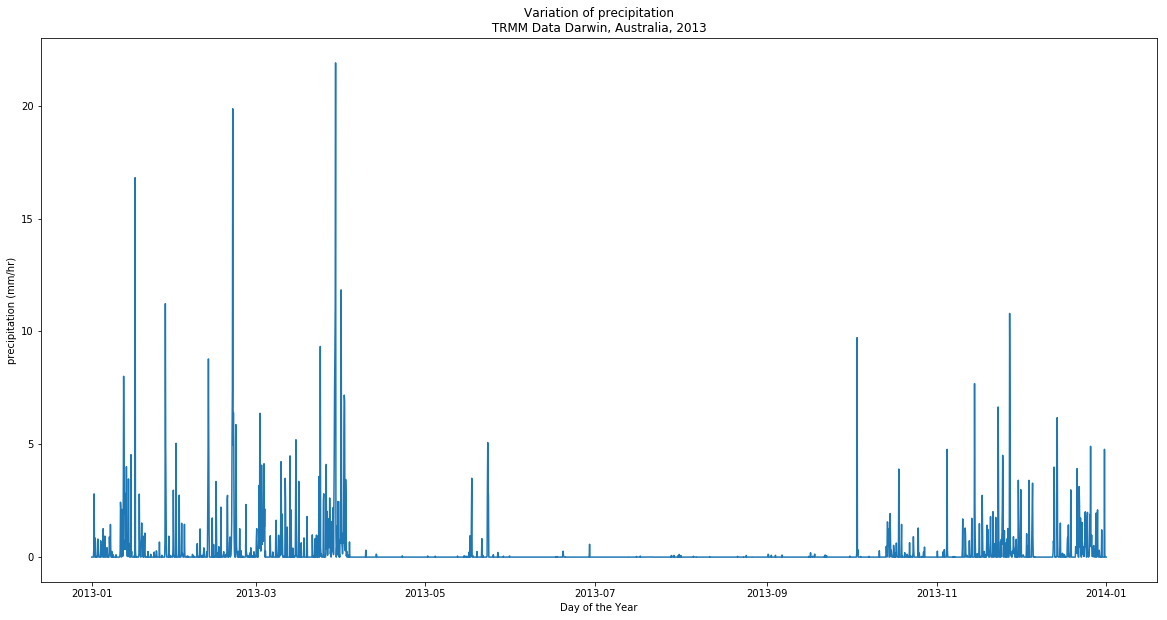

In [118]:
plt.figure(figsize=(20,10))
plt.plot(da['time'],da['precipitation'])
plt.xlabel('Day of the Year')
plt.ylabel('precipitation (mm/hr)')
plt.title('Variation of precipitation\n TRMM Data Darwin, Australia, 2013 ')
#plt.savefig(r'\Users\dhanu\Desktop\Research Results\AUSTimeseriesTRMM.png',dpi=300)

In [62]:
da.describe()

,precipitation
count,2921.000000
mean,0.256840
std,1.118235
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,21.903828


0.25683951264156113 1.1180431820261323


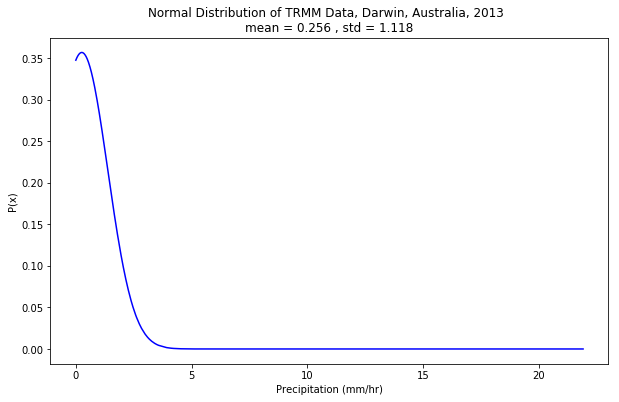

In [119]:
 plt.figure(figsize=(10,6))

sta= sorted(da['precipitation'])   
spdf2 =stats.norm.pdf(sta,np.mean(sta),np.std(sta))
plt.plot(sta,spdf2,'b')

plt.xlabel('Precipitation (mm/hr)')
plt.ylabel('P(x)')
plt.title('Normal Distribution of TRMM Data, Darwin, Australia, 2013  \nmean = 0.256 , std = 1.118')
plt.plot()
print(np.mean(sta),np.std(sta))
#plt.savefig(r'\Users\dhanu\Desktop\Research Results\AusTRMMnPDF.png',dpi=300)

In [64]:
das = sorted(x for x in sta if x >= 0.8)


In [65]:
fit= powerlaw.Fit(das)
fit.power_law.alpha
fit.power_law.sigma
print(fit.power_law.alpha, fit.power_law.sigma)
fit.distribution_compare('power_law', 'lognormal')

3.175975201037002 0.3046974737350958


Calculating best minimal value for power law fit
D:\Anaconda\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(-0.15742219192962925, 0.7057580877804648)

Text(0,0.5,'P(x)')

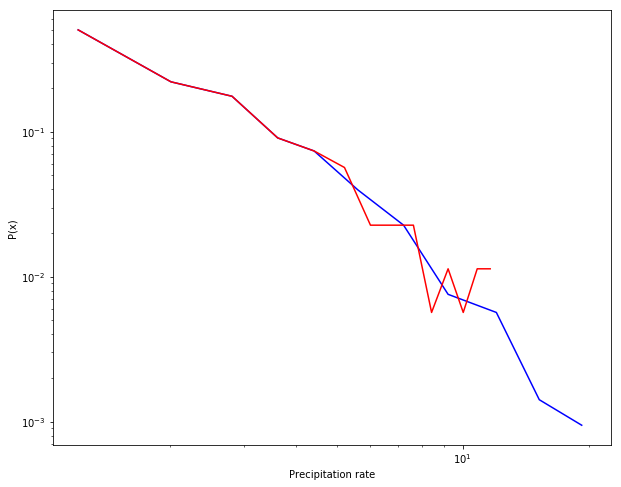

In [66]:
plt.figure(figsize=(10,8))
powerlaw.plot_pdf(das, color ='b')
powerlaw.plot_pdf(das, color ='r',linear_bins= True)
plt.xlabel('Precipitation rate')
plt.ylabel('P(x)')


In [67]:
ncf2 = netCDF4.Dataset(r"C:\Users\dhanu\Desktop\newdata\australia\AustraliaTtwprainwbC3.b1.20130101.000000.custom.cdf", format = 'NETCDF3_CLASSIC') 

In [68]:
print(ncf2)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    command_line: rainwb_ingest -s twp -f C3 -R
    Conventions: ARM-1.1
    process_version: ingest-rainwb-1.1-0.el6
    dod_version: rainwb-b1-1.0
    input_source: /data/home/dyapa/prod/jobs/1414/collection/twp/twprainwbC3.00/twprainC3.00.20121231.235900.raw.wrg-20130101000000.dat
    site_id: twp
    platform_id: rainwb
    facility_id: C3
    data_level: b1
    location_description: Tropical Western Pacific (TWP), Darwin, Australia
    datastream: twprainwbC3.b1
    serial_number: 2944
    sampling_interval: 1 minute
    averaging_interval: 5 minutes
    doi: 10.5439/1224830
    history: created by user dyapa on machine amber at 2016-06-14 21:49:48, using ingest-rainwb-1.1-0.el6
    ANDERS_input_file: /var/ftp/user_order/pantd1/208307/twprainwbC3.b1.20130101.000000.cdf
    ANDERS_processing_timestamp: Thu Dec  6 01:43:18 2018 UTC
    ANDERS_armtime_timestamp: 1544060598
    ANDERS_vers

In [69]:
print(ncf.variables.keys())

odict_keys(['alt', 'base_time', 'lat', 'lon', 'precip_rate', 'qc_frequency1', 'qc_frequency2', 'qc_frequency3', 'qc_maintenance_cnt', 'qc_precip', 'qc_precip_rate', 'qc_ptemp', 'qc_temp1', 'qc_temp2', 'qc_temp3', 'qc_total_mm', 'qc_total_weight', 'qc_volt_min', 'qc_weight1', 'qc_weight2', 'qc_weight3', 'time', 'time_offset'])


In [70]:
for i in ncf2.variables:
    print(i,ncf2.variables[i].shape)

alt ()
base_time ()
lat ()
lon ()
precip_rate (105002,)
qc_frequency1 (105002,)
qc_frequency2 (105002,)
qc_frequency3 (105002,)
qc_maintenance_cnt (105002,)
qc_precip (105002,)
qc_precip_rate (105002,)
qc_ptemp (105002,)
qc_temp1 (105002,)
qc_temp2 (105002,)
qc_temp3 (105002,)
qc_total_mm (105002,)
qc_total_weight (105002,)
qc_volt_min (105002,)
qc_weight1 (105002,)
qc_weight2 (105002,)
qc_weight3 (105002,)
time (105002,)
time_offset (105002,)


In [71]:
ncf2.variables['qc_precip_rate'].units


'unitless'

In [72]:
ncf2.variables['time'].units

'seconds since 2013-01-01 00:00:00 0:00'

In [73]:
ncf2.variables['precip_rate'].units

'mm/hr'

In [74]:
prec2 =ncf2.variables['precip_rate'][:]
prec2[:20]

masked_array(data=[0.024399999529123306, --, 0.07199999690055847,
                   0.11959999799728394, --, --, --, --, --, --,
                   0.3959999978542328, 0.15600000321865082, --, --,
                   0.15600000321865082, --, --, --, --,
                   0.5040000081062317],
             mask=[False,  True, False, False,  True,  True,  True,  True,
                    True,  True, False, False,  True,  True, False,  True,
                    True,  True,  True, False],
       fill_value=-9999.0,
            dtype=float32)

In [75]:
ncf2.variables['time'][:10]

masked_array(data=[   0.,  300.,  600.,  900., 1200., 1500., 1800., 2100.,
                   2400., 2700.],
             mask=False,
       fill_value=1e+20)

In [76]:
time_s2 =ncf2.variables['time']
time_s2

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time offset from midnight
    units: seconds since 2013-01-01 00:00:00 0:00
    bounds: time_bounds
    standard_name: time
unlimited dimensions: time
current shape = (105002,)
filling off

In [77]:
dtime2 = netCDF4.num2date(time_s2[:],time_s2.units)

In [78]:
dtime2[10:]

array([datetime.datetime(2013, 1, 1, 0, 50),
       datetime.datetime(2013, 1, 1, 0, 55),
       datetime.datetime(2013, 1, 1, 1, 0), ...,
       datetime.datetime(2013, 12, 31, 23, 45, 0, 6),
       datetime.datetime(2013, 12, 31, 23, 50),
       datetime.datetime(2013, 12, 31, 23, 55, 0, 10)], dtype=object)

In [79]:
prec_ts2 = pd.Series(prec2, index=dtime2) 
prec_ts2.to_csv('precip2.csv',index=True, header=True)

In [80]:
df2= pd.read_csv('precip2.csv')
df2.head(10)

,Unnamed: 0,0
0,2013-01-01 00:00:00.000000,0.0244
1,2013-01-01 00:05:00.000000,NaN
2,2013-01-01 00:10:00.000000,0.0720
3,2013-01-01 00:15:00.000000,0.1196
4,2013-01-01 00:20:00.000002,NaN
5,2013-01-01 00:25:00.000000,NaN
6,2013-01-01 00:30:00.000006,NaN
7,2013-01-01 00:35:00.000000,NaN
8,2013-01-01 00:40:00.000010,NaN
9,2013-01-01 00:45:00.000000,NaN


In [81]:
df2= df2.rename(columns={'Unnamed: 0': 'Time', '0': 'Precipitation'})
df2.head(5)

,Time,Precipitation
0,2013-01-01 00:00:00.000000,0.0244
1,2013-01-01 00:05:00.000000,NaN
2,2013-01-01 00:10:00.000000,0.0720
3,2013-01-01 00:15:00.000000,0.1196
4,2013-01-01 00:20:00.000002,NaN


In [82]:
df2['Time'] = pd.to_datetime(df2['Time'])
df2['Year'] = df2['Time'].apply(lambda Time: Time.year)
df2['Month'] = df2['Time'].apply(lambda Time: Time.month)
df2['Day of Week'] = df2['Time'].apply(lambda Time: Time.dayofweek)
df2.head(5)

,Time,Precipitation,Year,Month,Day of Week
0,2013-01-01 00:00:00.000000,0.0244,2013,1,1
1,2013-01-01 00:05:00.000000,NaN,2013,1,1
2,2013-01-01 00:10:00.000000,0.0720,2013,1,1
3,2013-01-01 00:15:00.000000,0.1196,2013,1,1
4,2013-01-01 00:20:00.000002,NaN,2013,1,1


In [83]:
df2.isnull().any()

Time             False
Precipitation     True
Year             False
Month            False
Day of Week      False
dtype: bool

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105002 entries, 0 to 105001
Data columns (total 5 columns):
Time             105002 non-null datetime64[ns]
Precipitation    56603 non-null float64
Year             105002 non-null int64
Month            105002 non-null int64
Day of Week      105002 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.0 MB


In [85]:
df2.describe()

,Precipitation,Year,Month,Day of Week
count,56603.000000,105002.0,105002.000000,105002.000000
mean,0.433426,2013.0,6.528866,2.995638
std,3.153190,0.0,3.448764,2.000847
min,0.000000,2013.0,1.000000,0.000000
25%,0.000000,2013.0,4.000000,1.000000
50%,0.000000,2013.0,7.000000,3.000000
75%,0.108200,2013.0,10.000000,5.000000
max,95.412000,2013.0,12.000000,6.000000


In [86]:
df2[df2['Precipitation']>90]

,Time,Precipitation,Year,Month,Day of Week
20249,2013-03-12 07:25:00.000010,95.412,2013,3,1
23700,2013-03-24 07:00:00.000000,92.784,2013,3,6
88505,2013-11-04 17:15:00.000000,91.560,2013,11,0


D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


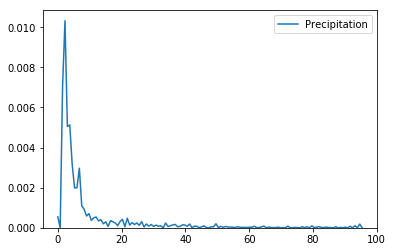

In [87]:
sns.kdeplot(df2['Precipitation'])

Text(0.5,1,'Weighing Bucket Rain Guage')

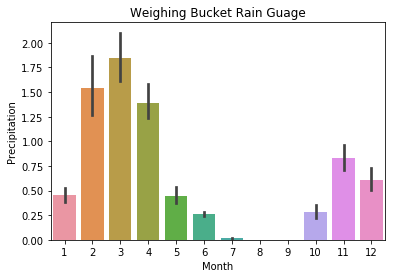

In [88]:
sns.barplot(x='Month',y='Precipitation',data=df2)
plt.title('Weighing Bucket Rain Guage')

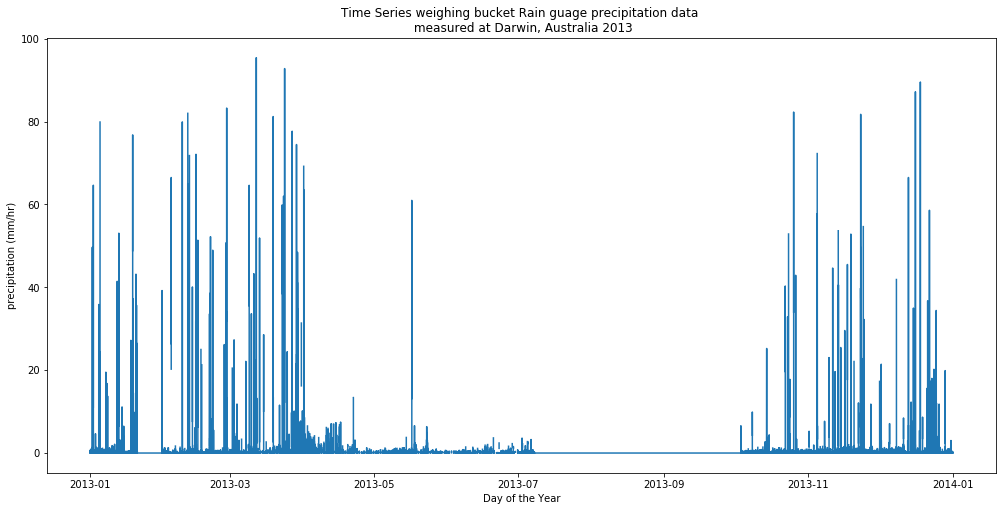

In [120]:
plt.figure(figsize=(17,8))
plt.plot(df2['Time'],df2['Precipitation'])
plt.xlabel('Day of the Year')
plt.ylabel('precipitation (mm/hr)')
plt.title('Time Series weighing bucket Rain guage precipitation data \n measured at Darwin, Australia 2013')
#plt.savefig(r'\Users\dhanu\Desktop\Research Results\TimeseriesWBRGnPDF2.png',dpi=300)


D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1653: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1654: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x) & (scale > 0)


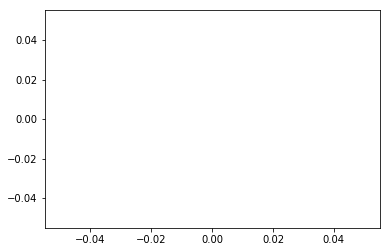

In [90]:
asd2= sorted(df2['Precipitation'])
hstd2 = np.std(asd2) 
hmean2 = np.mean(asd2)    
pdf2 =stats.norm.pdf(asd2,hmean2,hstd2)
plt.plot(asd2,pdf2)

In [91]:
df2['Precipitation'].count()

56603

In [92]:
sum(df2['Precipitation'].isnull())

48399

In [93]:
dp2= df2.drop('Day of Week', axis=1)

In [94]:
dp2.head()

,Time,Precipitation,Year,Month
0,2013-01-01 00:00:00.000000,0.0244,2013,1
1,2013-01-01 00:05:00.000000,NaN,2013,1
2,2013-01-01 00:10:00.000000,0.0720,2013,1
3,2013-01-01 00:15:00.000000,0.1196,2013,1
4,2013-01-01 00:20:00.000002,NaN,2013,1


In [95]:
dp2.fillna(0, inplace=True)
dp2.head(10)

,Time,Precipitation,Year,Month
0,2013-01-01 00:00:00.000000,0.0244,2013,1
1,2013-01-01 00:05:00.000000,0.0000,2013,1
2,2013-01-01 00:10:00.000000,0.0720,2013,1
3,2013-01-01 00:15:00.000000,0.1196,2013,1
4,2013-01-01 00:20:00.000002,0.0000,2013,1
5,2013-01-01 00:25:00.000000,0.0000,2013,1
6,2013-01-01 00:30:00.000006,0.0000,2013,1
7,2013-01-01 00:35:00.000000,0.0000,2013,1
8,2013-01-01 00:40:00.000010,0.0000,2013,1
9,2013-01-01 00:45:00.000000,0.0000,2013,1


In [96]:
pdf2

array([nan, nan, nan, ..., nan, nan, nan])

0.23364512788986563 2.325146000984823


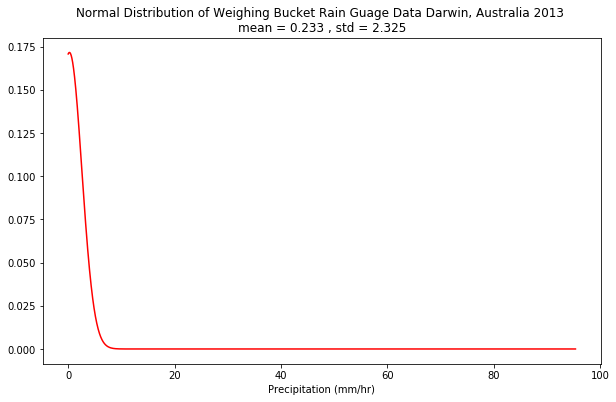

In [121]:
plt.figure(figsize=(10,6))
sdp2= sorted(dp2['Precipitation'])   
pdf2 =stats.norm.pdf(sdp2,np.mean(sdp2),np.std(sdp2))
plt.plot(sdp2,pdf2,'r')
plt.xlabel('Precipitation (mm/hr)')
plt.title('Normal Distribution of Weighing Bucket Rain Guage Data Darwin, Australia 2013 \nmean = 0.233 , std = 2.325')
#plt.text(.5,.5,'mean = 1.185 , std = 5.126')
plt.plot()
print(np.mean(sdp2),np.std(sdp2))
#plt.savefig(r'\Users\dhanu\Desktop\Research Results\AusRG2.png',dpi=300)


In [98]:
sdp2.count(0)

77324

In [99]:
pl2 = sorted(x for x in sdp2[51877:]if x >= 0.8)

In [100]:
fit= powerlaw.Fit(pl2)
fit.power_law.alpha
fit.power_law.sigma
print(fit.power_law.alpha, fit.power_law.sigma)
fit.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit
D:\Anaconda\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


1.9197536486949647 0.023354233629587138


(-33.28539145003347, 1.715354695210126e-08)

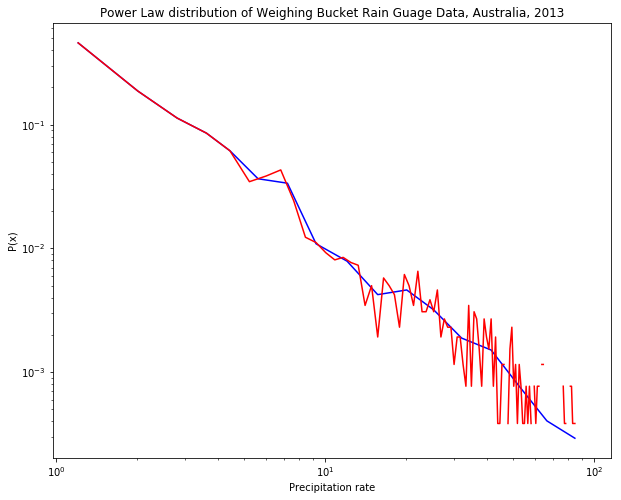

In [101]:
plt.figure(figsize=(10,8))
powerlaw.plot_pdf(pl2, color ='b')
powerlaw.plot_pdf(pl2, color ='r',linear_bins= True)
plt.xlabel('Precipitation rate')
plt.ylabel('P(x)')

plt.title('Power Law distribution of Weighing Bucket Rain Guage Data, Australia, 2013' )
#plt.savefig(r'\Users\dhanu\Desktop\Research Results\ausWBRG2.png',dpi=300)


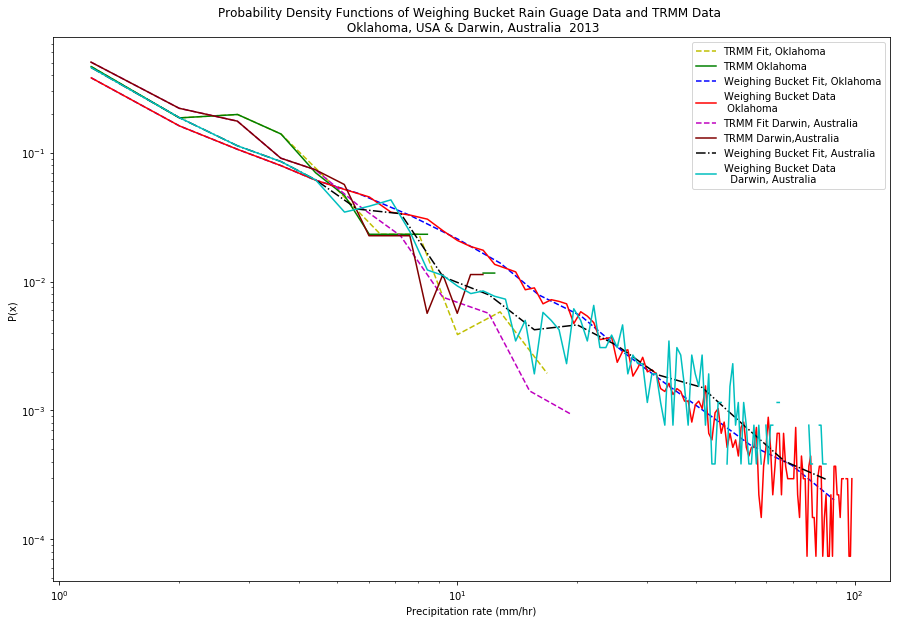

In [125]:
plt.figure(figsize=(15,10))
powerlaw.plot_pdf(ttm, color ='y', label= 'TRMM Fit, Oklahoma',linestyle ='--',)
powerlaw.plot_pdf(ttm, color ='g',linear_bins= True, label= 'TRMM Oklahoma')

#plt.title('Power Law distribution of Weighing Bucket Rain Guage Data, Oklahama, USA for year 2013' )

powerlaw.plot_pdf(pl, color ='b', linestyle ='--',label ='Weighing Bucket Fit, Oklahoma')
powerlaw.plot_pdf(pl, color ='r',linear_bins= True, label= 'Weighing Bucket Data\n Oklahoma')

powerlaw.plot_pdf(das, color ='m', label = 'TRMM Fit Darwin, Australia',linestyle ='--',)
powerlaw.plot_pdf(das, color ='maroon',linear_bins= True, label = 'TRMM Darwin,Australia')

powerlaw.plot_pdf(pl2, color ='k', label='Weighing Bucket Fit, Australia',linestyle ='-.',)
powerlaw.plot_pdf(pl2, color ='c',linear_bins= True, label= 'Weighing Bucket Data\n  Darwin, Australia')



plt.legend()
plt.xlabel('Precipitation rate (mm/hr)')
plt.ylabel('P(x)')
plt.title('Probability Density Functions of Weighing Bucket Rain Guage Data and TRMM Data \n Oklahoma, USA & Darwin, Australia  2013' )
plt.savefig(r'\Users\dhanu\Desktop\Research Results\allpowerPDF.png',dpi=300)


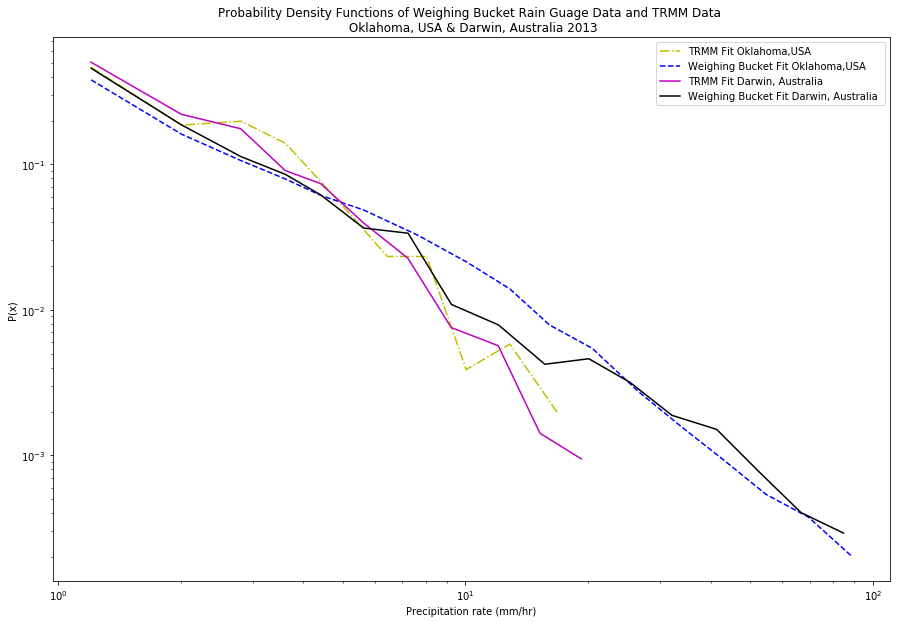

In [126]:
plt.figure(figsize=(15,10))
powerlaw.plot_pdf(ttm, color ='y', label= 'TRMM Fit Oklahoma,USA',linestyle ='-.')
#powerlaw.plot_pdf(ttm, color ='g',linear_bins= True, label= 'TRMM OKLAHAMA')

#plt.title('Power Law distribution of Weighing Bucket Rain Guage Data, Oklahama, USA for year 2013' )

powerlaw.plot_pdf(pl, color ='b', linestyle ='--',label ='Weighing Bucket Fit Oklahoma,USA')
#powerlaw.plot_pdf(pl, color ='r',linear_bins= True, label= 'Weighing Bucket Data\n Enperical OK')

powerlaw.plot_pdf(das, color ='m', label = 'TRMM Fit Darwin, Australia')
#powerlaw.plot_pdf(das, color ='r',linear_bins= True, Label = 'TRMM AUS')

powerlaw.plot_pdf(pl2, color ='k', label='Weighing Bucket Fit Darwin, Australia ')
#powerlaw.plot_pdf(pl2, color ='c',linear_bins= True, label= 'Weighing Bucket Data\n Enperical AUS')



plt.legend()
plt.xlabel('Precipitation rate (mm/hr)')
plt.ylabel('P(x)')
plt.title('Probability Density Functions of Weighing Bucket Rain Guage Data and TRMM Data \n Oklahoma, USA & Darwin, Australia 2013' )
plt.savefig(r'\Users\dhanu\Desktop\Research Results\cpowerPDF.png',dpi=300)

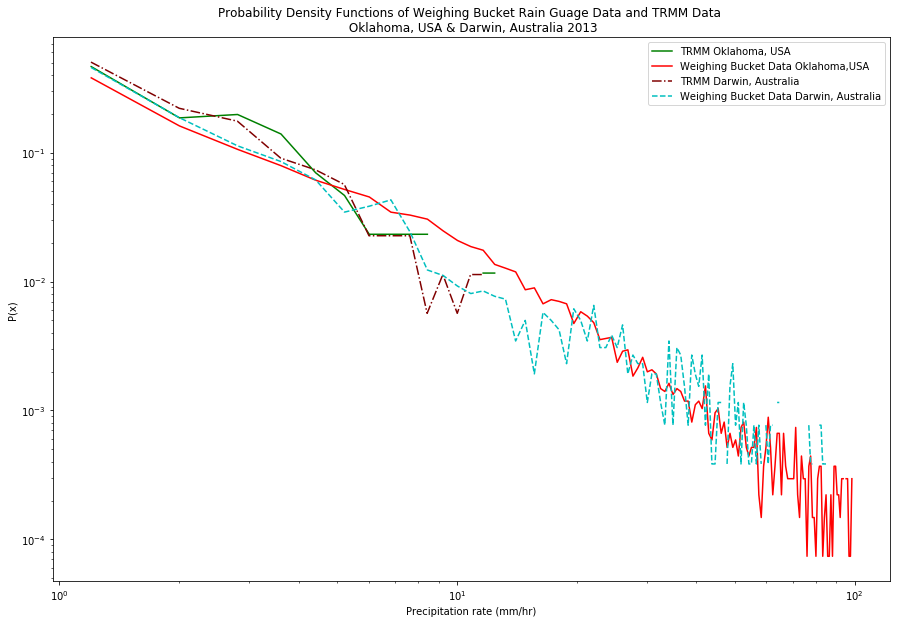

In [124]:
plt.figure(figsize=(15,10))
#powerlaw.plot_pdf(ttm, color ='y', label= 'TRMM Fit')
powerlaw.plot_pdf(ttm, color ='g',linear_bins= True, label= 'TRMM Oklahoma, USA')

#plt.title('Power Law distribution of Weighing Bucket Rain Guage Data, Oklahoma, USA for year 2013' )

#powerlaw.plot_pdf(pl, color ='b', linestyle ='--',label ='Weighing Bucket Fit, OK')
powerlaw.plot_pdf(pl, color ='r',linear_bins= True, label= 'Weighing Bucket Data Oklahoma,USA')

#powerlaw.plot_pdf(das, color ='m', label = 'TRMM Fit AUS')
powerlaw.plot_pdf(das, color ='maroon',linear_bins= True, label = 'TRMM Darwin, Australia',linestyle ='-.')

#powerlaw.plot_pdf(pl2, color ='k', label='Weighing Bucket Fit, AUS')
powerlaw.plot_pdf(pl2, color ='c',linear_bins= True, label= 'Weighing Bucket Data Darwin, Australia',linestyle ='--')



plt.legend()
plt.xlabel('Precipitation rate (mm/hr)')
plt.ylabel('P(x)')
plt.title('Probability Density Functions of Weighing Bucket Rain Guage Data and TRMM Data \n Oklahoma, USA & Darwin, Australia 2013' )
plt.savefig(r'\Users\dhanu\Desktop\Research Results\ppowerPDF.png',dpi=300)